<a href="https://colab.research.google.com/github/james-taban/MACHINE_LEARNING_PROJECT/blob/main/MACHINE_LEARNING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
url = "https://raw.githubusercontent.com/james-taban/MACHINE_LEARNING_PROJECT/main/Students%20data.csv"
df1 = pd.read_csv(url)
df1 = df1.drop(['ID', 'class', 'gender', 'race', 'Measure', 'Functional_analysis', 'from1', 'from2', 'from3', 'from4', 'y'], axis=1)

df1

,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability
0,73.47,64,81,87,60,74
1,71.22,57,50,51,51,55
2,74.56,47,48,71,60,61
3,72.89,46,72,38,60,29
4,70.11,49,45,63,60,66
...,...,...,...,...,...,...
100,88.34,87,83,92,98,93
101,89.84,98,77,95,98,96
102,88.82,83,80,91,98,93
103,86.60,92,82,91,99,94


In [8]:
df1 = df1.dropna()
df1

,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability
0,73.47,64,81,87,60,74
1,71.22,57,50,51,51,55
2,74.56,47,48,71,60,61
3,72.89,46,72,38,60,29
4,70.11,49,45,63,60,66
...,...,...,...,...,...,...
100,88.34,87,83,92,98,93
101,89.84,98,77,95,98,96
102,88.82,83,80,91,98,93
103,86.60,92,82,91,99,94


In [12]:
scaled_df = StandardScaler().fit_transform(df1)

scaled_df[:5]

array([[-1.57479854e+00, -1.03346973e+00,  7.44561324e-01,
         5.39815336e-01, -2.45911240e+00, -9.43809765e-01],
       [-1.94828636e+00, -1.63346993e+00, -1.80922910e+00,
        -1.87212553e+00, -3.33969642e+00, -2.75952865e+00],
       [-1.39386444e+00, -2.49061307e+00, -1.97398977e+00,
        -5.32158381e-01, -2.45911240e+00, -2.18614374e+00],
       [-1.67107540e+00, -2.57632739e+00,  3.13829852e-03,
        -2.74310417e+00, -2.45911240e+00, -5.24419659e+00],
       [-2.13254035e+00, -2.31918445e+00, -2.22113078e+00,
        -1.06814524e+00, -2.45911240e+00, -1.70832298e+00]])

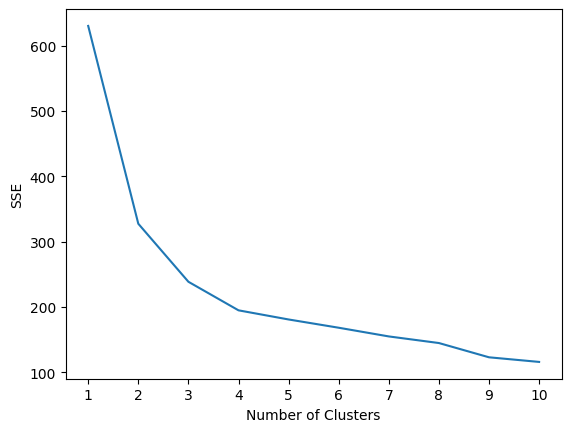

In [13]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [14]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [15]:
#append cluster assingments to original DataFrame
df1['cluster'] = kmeans.labels_

#view updated DataFrame
print(df1)

       GPA  Algebra  Calculus1  Calculus2  Statistics  Probability  cluster
0    73.47       64         81         87          60           74        1
1    71.22       57         50         51          51           55        3
2    74.56       47         48         71          60           61        3
3    72.89       46         72         38          60           29        3
4    70.11       49         45         63          60           66        3
..     ...      ...        ...        ...         ...          ...      ...
100  88.34       87         83         92          98           93        2
101  89.84       98         77         95          98           96        2
102  88.82       83         80         91          98           93        2
103  86.60       92         82         91          99           94        2
104  93.71       93         97         99         100           97        2

[105 rows x 7 columns]


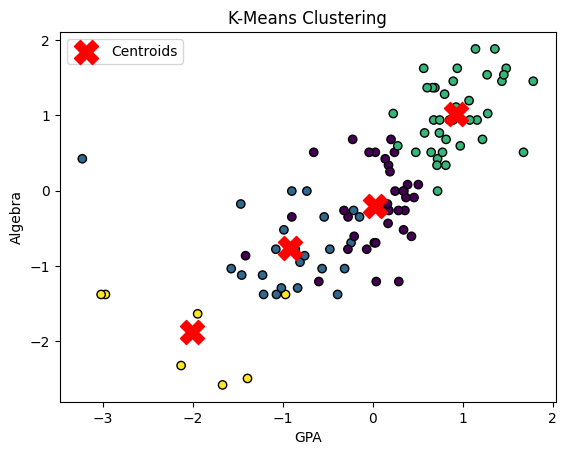

In [22]:
# plot the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df1['cluster'], cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('GPA')
plt.ylabel('Algebra')
plt.legend()
plt.show()